In [70]:
import pandas as pd
import pyodbc as py
connection_string = (    
    r'Driver={SQL Server};'
    r'Server=LAPTOP-LD74USH0\SQLEXPRESS;'
    r'Integrated Security=SSPI;'
    r'Trusted_Connection=yes;'
)
pd.set_option('display.max_columns', None)

In [71]:
import seaborn as sns
from datetime import date

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
def sql2df(query, params=[], parse_dates=None, dsn='SQLEXPRESS'):
        with py.connect(connection_string, readonly=True) as conn:
            return pd.read_sql(query, conn, params=params, parse_dates=parse_dates)

In [73]:
df = sql2df('''
SELECT * FROM Seminar.dbo.cleaned_bol_data_full;
''')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772950 entries, 0 to 4772949
Data columns (total 78 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   orderDate                         object        
 1   productId                         object        
 2   sellerId                          object        
 3   totalPrice                        float64       
 4   quantityOrdered                   int64         
 5   countryCode                       object        
 6   cancellationDate                  object        
 7   cancellationReasonCode            object        
 8   promisedDeliveryDate              object        
 9   shipmentDate                      object        
 10  transporterCode                   object        
 11  transporterName                   object        
 12  transporterNameOther              object        
 13  dateTimeFirstDeliveryMoment       datetime64[ns]
 14  fulfilmentType    

In [75]:
#Change type of columns
dtype = {'calculationDefinitive': bool,
         'noCancellation': bool,
         'noCase': bool,
         'hasOneCase': bool,
         'hasMoreCases': bool,
         'noReturn': bool,
         'orderWeekend': bool,
         'orderCorona': bool,
         'countryCodeNL': bool,
         'fulfilmentByBol': bool,
         'countryOriginNL': bool,
         'countryOriginBE': bool,
         'countryOriginDE': bool,
         'orderMonday': bool,
         'orderTuesday': bool,
         'orderWednesday': bool,
         'orderThursday': bool,
         'orderFriday': bool,
         'orderSaturday': bool,
         'orderSunday': bool,
         'orderJanuary': bool,
         'orderFebruary': bool,
         'orderMarch': bool,
         'orderApril': bool,
         'orderMay': bool,
         'orderJune': bool,
         'orderJuly': bool,
         'orderAugust': bool,
         'orderSeptember': bool,
         'orderOctober': bool,
         'orderNovember': bool,
         'orderDecember': bool}

df = df.astype(dtype)

#Transform dates to date-type
df['orderDate'] = pd.to_datetime(df['orderDate'], errors='coerce')
df['cancellationDate'] = pd.to_datetime(df['cancellationDate'], errors='coerce')
df['promisedDeliveryDate'] = pd.to_datetime(df['promisedDeliveryDate'], errors='coerce')
df['shipmentDate'] = pd.to_datetime(df['shipmentDate'], errors='coerce')
df['dateTimeFirstDeliveryMoment'] = pd.to_datetime(df['dateTimeFirstDeliveryMoment'], errors='coerce')
df['startDateCase'] = pd.to_datetime(df['startDateCase'], errors='coerce')
df['returnDateTime'] = pd.to_datetime(df['returnDateTime'], errors='coerce')
df['registrationDateSeller'] = pd.to_datetime(df['registrationDateSeller'], errors='coerce')

df.dtypes

orderDate             datetime64[ns]
productId                     object
sellerId                      object
totalPrice                   float64
quantityOrdered                int64
                           ...      
orderSeptember                  bool
orderOctober                    bool
orderNovember                   bool
orderDecember                   bool
productTitleLength             int64
Length: 78, dtype: object

In [76]:
df.head()

,orderDate,productId,sellerId,totalPrice,quantityOrdered,countryCode,cancellationDate,cancellationReasonCode,promisedDeliveryDate,shipmentDate,transporterCode,transporterName,transporterNameOther,dateTimeFirstDeliveryMoment,fulfilmentType,startDateCase,cntDistinctCaseIds,returnDateTime,quantityReturned,returnCode,productTitle,brickName,chunkName,productGroup,productSubGroup,productSubSubGroup,registrationDateSeller,countryOriginSeller,currentCountryAvailabilitySeller,calculationDefinitive,noCancellation,onTimeDelivery,noCase,hasOneCase,hasMoreCases,noReturn,detailedMatchClassification,generalMatchClassification,determinantClassification,orderYear,orderMonth,orderYearMonth,orderWeekday,orderWeekend,orderCorona,transporterFeature,partnerSellingMonths,cancellationDays,shipmentDays,promisedDeliveryDays,actualDeliveryDays,caseDays,returnDays,countryCodeNL,fulfilmentByBol,countryOriginNL,countryOriginBE,countryOriginDE,orderMonday,orderTuesday,orderWednesday,orderThursday,orderFriday,orderSaturday,orderSunday,orderJanuary,orderFebruary,orderMarch,orderApril,orderMay,orderJune,orderJuly,orderAugust,orderSeptember,orderOctober,orderNovember,orderDecember,productTitleLength
0,2019-12-06,9000000012387632,656525,53.00,1,NL,NaT,None,2019-12-09,2019-12-06,UPS,UPS,None,NaT,FBR,NaT,NaN,NaT,NaN,None,Bresser Optics Hunter 16 x 50 verrekijker BK-7...,Verrekijkers,Verrekijker,Sound and Vision Accessories,Beeld en Geluid Accessoires,Camera Accessoires,2012-07-04,NL,ALL,True,True,None,True,False,False,True,UNKNOWN,UNKNOWN,Unknown delivery,2019,12,2019-12,5,False,True,UPS,89,NaN,0.0,3,NaN,NaN,NaN,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,52
1,2019-07-07,9200000011323565,656525,56.95,1,NL,NaT,None,2019-07-09,2019-07-08,UPS,UPS,None,NaT,FBR,NaT,NaN,NaT,NaN,None,National Geographic Verrekijker 10x50 Porro,Verrekijkers,Verrekijker,Sound and Vision Accessories,Beeld en Geluid Accessoires,Camera Accessoires,2012-07-04,NL,ALL,True,True,None,True,False,False,True,UNKNOWN,UNKNOWN,Unknown delivery,2019,07,2019-07,7,True,True,UPS,84,NaN,1.0,2,NaN,NaN,NaN,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,43
2,2019-11-25,9200000046125841,656525,16.95,1,NL,NaT,None,2019-11-27,2019-11-26,UPS,UPS,None,NaT,FBR,NaT,NaN,NaT,NaN,None,"National Geographic 4x30 BK-7 Zwart, Geel verr...",Verrekijkers,Verrekijker,Sound and Vision Accessories,Beeld en Geluid Accessoires,Camera Accessoires,2012-07-04,NL,ALL,True,True,None,True,False,False,True,UNKNOWN,UNKNOWN,Unknown delivery,2019,11,2019-11,1,False,True,UPS,88,NaN,1.0,2,NaN,NaN,NaN,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,53
3,2019-08-04,9200000086468758,656525,34.95,1,NL,NaT,None,2019-08-06,2019-08-05,UPS,UPS,None,NaT,FBR,NaT,NaN,NaT,NaN,None,Bresser Microscoop preparaten 25 stuks - Biologie,Verrekijkers,Verrekijker,Recreational and Outdoor Toys,Leren en Experimenteren,Leren en Experimenteren,2012-07-04,NL,ALL,True,True,None,True,False,False,True,UNKNOWN,UNKNOWN,Unknown delivery,2019,08,2019-08,7,True,True,UPS,85,NaN,1.0,2,NaN,NaN,NaN,True,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,49
4,2019-04-12,1000004001422158,742787,14.99,1,NL,NaT,None,2019-04-16,2019-04-13,TNT_BRIEF,PostNL Briefpost,None,NaT,FBR,NaT,NaN,NaT,NaN,None,The Very Best of the Eagles,Voorbespeelde Audio,Muziek,Music,CD,CD,2013-01-28,NL,NL,True,True,None,True,False,False,True,UNKNOWN,UNKNOWN,Unknown delivery,2019,04,2019-04,5,False,True,TNT_BRIEF,75,NaN,1.0,4,NaN,NaN,NaN,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,27


In [9]:
df.describe(include = 'all', datetime_is_numeric = False)

<ipython-input-9-1283d777435d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all', datetime_is_numeric = False)
<ipython-input-9-1283d777435d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all', datetime_is_numeric = False)
<ipython-input-9-1283d777435d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all', dateti

,orderDate,productId,sellerId,totalPrice,quantityOrdered,countryCode,cancellationDate,cancellationReasonCode,promisedDeliveryDate,shipmentDate,transporterCode,transporterName,transporterNameOther,dateTimeFirstDeliveryMoment,fulfilmentType,startDateCase,cntDistinctCaseIds,returnDateTime,quantityReturned,returnCode,productTitle,brickName,chunkName,productGroup,productSubGroup,productSubSubGroup,registrationDateSeller,countryOriginSeller,currentCountryAvailabilitySeller,calculationDefinitive,noCancellation,onTimeDelivery,noCase,hasOneCase,hasMoreCases,noReturn,detailedMatchClassification,generalMatchClassification,determinantClassification,orderYear,orderMonth,orderYearMonth,orderWeekday,orderWeekend,orderCorona,transporterFeature,partnerSellingMonths,cancellationDays,shipmentDays,promisedDeliveryDays,actualDeliveryDays,caseDays,returnDays,countryCodeNL,fulfilmentByBol,countryOriginNL,countryOriginBE,countryOriginDE,orderMonday,orderTuesday,orderWednesday,orderThursday,orderFriday,orderSaturday,orderSunday,orderJanuary,orderFebruary,orderMarch,orderApril,orderMay,orderJune,orderJuly,orderAugust,orderSeptember,orderOctober,orderNovember,orderDecember,productTitleLength
count,4772950,4772950,4772950,4.772950e+06,4.772950e+06,4772950,77473,77473,4772950,4695498,4686467,4686467,56017,3067802,4772950,164358,164358.000000,288763,284877.000000,6554,4772950,4772950,4753595,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,3063699,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4.772950e+06,4772950,4772950,4.772950e+06,4772950,4772950,4772950,4.772950e+06,77473.000000,4.695498e+06,4.772950e+06,3.067802e+06,164358.000000,288763.000000,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4772950,4.772950e+06
unique,716,428670,1911,NaN,NaN,2,739,25,716,737,27,27,2,2612759,2,745,NaN,744,NaN,11,470954,1116,4325,60,444,966,1207,3,3,1,2,2,2,2,2,2,5,3,14,NaN,12,24,NaN,2,1,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN
top,2020-12-14 00:00:00,9200000075472002,829931,NaN,NaN,NL,2020-12-14 00:00:00,CUST_FE,2020-12-01 00:00:00,2020-11-30 00:00:00,TNT,PostNL,OTHER,2020-12-12 00:00:00,FBR,2019-12-03 00:00:00,NaN,2020-12-01 00:00:00,NaN,NO_REASON_PROVIDED,Apple EarPods - met lightning connector - wit,Hoesjes voor Mobiele Telefoon,Hoesje voor mobiele telefoon,Telephone and Tablet Accessories,Telefonie en Tablet Bescherming,Telefonie Bescherming,2013-07-31 00:00:00,NL,NL,True,True,true,True,False,False,True,KNOWN HAPPY,KNOWN HAPPY,All good,NaN,11,2020-11,NaN,False,True,TNT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,NaN
freq,21860,47201,812624,NaN,NaN,3554065,394,50969,26237,27129,2108544,2108544,53494,170,3448479,1101,NaN,819,NaN,2256,38613,497517,426146,847870,565441,494430,812624,4678541,3138478,4772950,4749257,2898055,4608592,4630323,4751219,4492395,2685606,2685606,2685606,NaN,606765,381513,NaN,3564479,4772950,2108544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3554065,3448479,4678541,4685080,4766411,3993709,4030163,4015269,4098367,4162763,4247211,4090218,4443781,4489119,4410853,4377612,4381522,4393845,4393771,4393696,4415844,4362460,4166185,4273762,NaN
first,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,2019-01-02 00:00:00,2019-01-01 00:00:00,NaN,NaN,NaN,2019-01-02 13:00:33,NaN,2019-01-01 00:00:00,NaN,2019-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007-04-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-12-16 00:00:00,NaN,NaN,NaN,NaN,NaN,2021-01-11 00:00:00,NaN,2021-01-06 00:00:00,2021-01-09 00:00:00,NaN,NaN,NaN,2021-01-14 17:42:31,NaN,2021-01-14 00:00:00,NaN,2

In [44]:
#Calculate totals per Match Determinant
totalCase = df['caseDays'].count()
totalReturn = df['returnDays'].count()
totalCancel = df['cancellationDays'].count()
totalPromisedDelivery = df['promisedDeliveryDays'].count()
totalDelivery = df['actualDeliveryDays'].count()

In [45]:
#Create table for plot
periodTable = pd.concat([df['caseDays'].value_counts().sort_index(),
                         df['returnDays'].value_counts().sort_index(),
                         df['cancellationDays'].value_counts().sort_index(),
                         df['actualDeliveryDays'].value_counts().sort_index()],axis=1)

In [46]:
#Create percantages per day and calculate running sum
periodTable['caseDays%'] = (periodTable['caseDays'] / totalCase).cumsum()
periodTable['returnDays%'] = (periodTable['returnDays'] / totalReturn).cumsum()
periodTable['cancellationDays%'] = (periodTable['cancellationDays'] / totalCancel).cumsum()
periodTable['actualDeliveryDays%'] = (periodTable['actualDeliveryDays'] / df.shape[0]).cumsum()

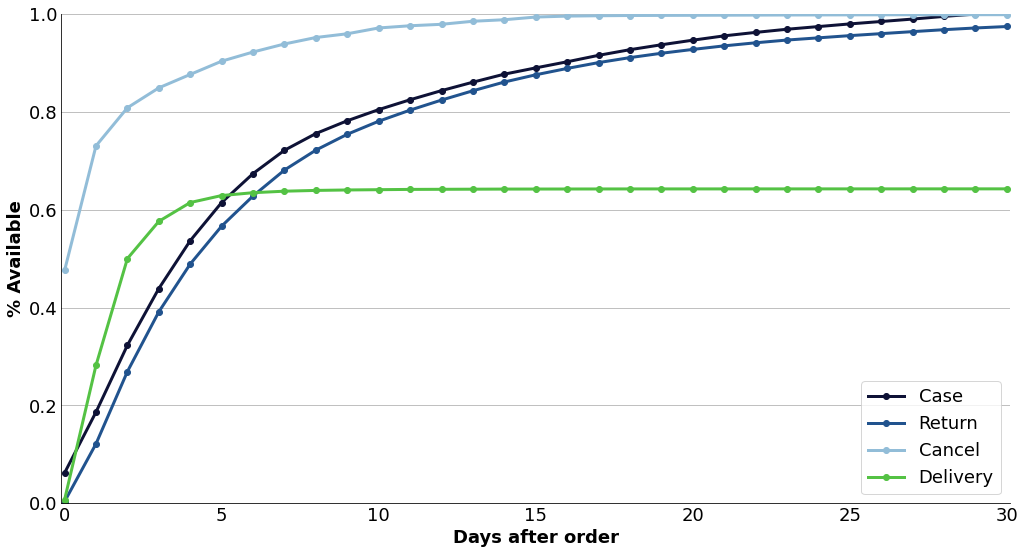

In [47]:
### Plot parameters
plt.rcParams.update({'font.size': 18})

# Turn interactive plotting off
plt.ioff()

# Color palettes
color1 = ['#364958','#3b6064','#55828b','#87bba2','#c9e4ca']
color2 = ['#051923','#003554','#006494','#0582ca','#00a6fb']
color3 = ['#fb8500','#ffb703','#023047','#219ebc','#8ecae6']
color4 = ['#0e1236','#21538e','#92bdd8','#99c244','#54c244']
COLOR = color4

### Plotten
plt.figure(figsize = (17,9))

plt.plot(periodTable['caseDays%'], color=COLOR[0], marker = 'o', linewidth=3)
plt.plot(periodTable['returnDays%'], color=COLOR[1], marker = 'o', linewidth=3)
plt.plot(periodTable['cancellationDays%'], color=COLOR[2], marker = 'o', linewidth=3)
plt.plot(periodTable['actualDeliveryDays%'], color=COLOR[4], marker = 'o', linewidth=3)

### Titel
plt.title('', fontweight = 'bold')

### Assen
plt.ylabel('% Available', fontweight = 'bold')
plt.ylim(0,1.0)

plt.xlabel('Days after order', fontweight = 'bold')
plt.xlim(-0.1, 30.1)
#plt.xticks(x,('tick_1', 'tick_2', 'tick_3', 'tick_4'))

#plt.axvline(x=5, color='red')

### Grafiek Lay-out
plt.grid(color='#C0C0C0', linestyle='-', linewidth=1, axis = 'y')
plt.legend(('Case', 'Return', 'Cancel', 'Delivery'),loc='lower right')
plt.tick_params(direction='out', length=0, colors='black')
sns.despine(left=False, bottom=False, right=True)

plt.savefig('plot.png',dpi = 300)
plt.show()

In [77]:
def createColumns(df,X):
    """
    Function to create dynamic columns based on the prediction period.
    X = number of days after order date
    """
    
    dynamic_cols = ['caseDays','returnDays','cancellationDays','actualDeliveryDays']
    
    for col in dynamic_cols:
        
        dynamic_colname = col+'_'+str(X)
        df[dynamic_colname] = df[col].dt.days
        df[dynamic_colname] = df[dynamic_colname].apply(lambda x: x if x <= X else None)
        
    return df

In [78]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [79]:
#Categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['productId', 'sellerId', 'countryCode', 'cancellationReasonCode', 'transporterCode', 'transporterName', 'transporterNameOther', 'fulfilmentType', 'returnCode', 'productTitle', 'brickName', 'chunkName', 'productGroup', 'productSubGroup', 'productSubSubGroup', 'countryOriginSeller', 'currentCountryAvailabilitySeller', 'onTimeDelivery', 'detailedMatchClassification', 'generalMatchClassification', 'determinantClassification', 'orderMonth', 'orderYearMonth', 'transporterFeature']


In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=0,
                             class_weight='balanced')

X = ['totalPrice','quantityOrdered','promisedDeliveryDays','orderCorona','partnerSellingMonths',
        'countryCodeNL', 'fulfilmentByBol', 'countryOriginNL', 'countryOriginBE', 'countryOriginDE', 'orderWeekend',
        'orderMonday','orderTuesday', 'orderWednesday', 'orderThursday', 'orderFriday', 'orderSaturday', 'orderSunday',
        'orderJanuary', 'orderFebruary', 'orderMarch', 'orderApril', 'orderMay', 'orderJune', 'orderJuly',
        'orderAugust', 'orderSeptember', 'orderOctober', 'orderNovember', 'orderDecember', 'productTitleLength']
y = ['generalMatchClassification']
    
df_test = df[X+y].dropna()

clf = clf.fit(df_test[X],df_test[y])

prediction = clf.predict(df_test[X])

print("Accuracy:",metrics.accuracy_score(df_test[y], prediction))

Accuracy: 0.9141690149697776


In [ ]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

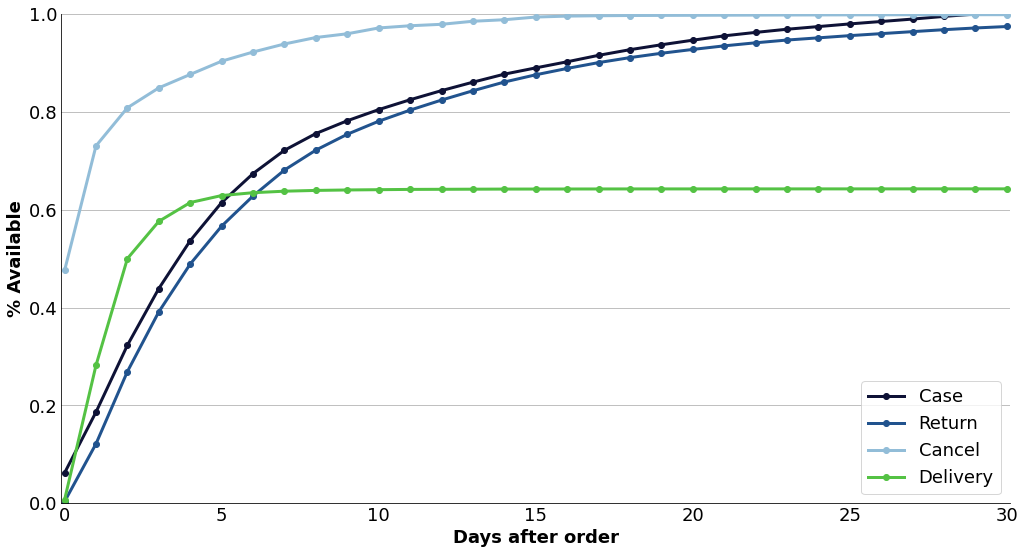

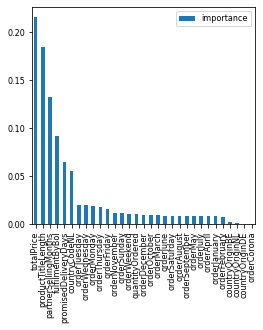

In [19]:
plt.rcParams.update({'font.size': 8})
importanceDF = pd.DataFrame(clf.feature_importances_,index=X,columns=['importance']).sort_values('importance',ascending=False)
importanceDF.plot.bar(figsize=(4,4))
plt.show()

In [20]:
print(metrics.classification_report(df_test[y], prediction))

              precision    recall  f1-score   support

 KNOWN HAPPY       0.98      0.90      0.94   2685606
     UNHAPPY       0.63      0.90      0.74    569696
     UNKNOWN       0.96      0.94      0.95   1517648

    accuracy                           0.91   4772950
   macro avg       0.86      0.91      0.88   4772950
weighted avg       0.93      0.91      0.92   4772950



In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

RF = RandomForestClassifier(n_estimators=10,
                            random_state=0,
                            class_weight='balanced')

X = ['totalPrice','quantityOrdered','promisedDeliveryDays','orderCorona','partnerSellingMonths',
        'countryCodeNL', 'fulfilmentByBol', 'countryOriginNL', 'countryOriginBE', 'countryOriginDE', 'orderWeekend',
        'orderMonday','orderTuesday', 'orderWednesday', 'orderThursday', 'orderFriday', 'orderSaturday', 'orderSunday',
        'orderJanuary', 'orderFebruary', 'orderMarch', 'orderApril', 'orderMay', 'orderJune', 'orderJuly',
        'orderAugust', 'orderSeptember', 'orderOctober', 'orderNovember', 'orderDecember', 'productTitleLength']
y = ['generalMatchClassification']

df_test = df[X+y].dropna()

RF_fit = RF.fit(df_test[X], df_test[y])
RF_pred = RF_fit.predict(df_test[X])

RF_acc = metrics.accuracy_score(df_test[y], RF_pred)

<ipython-input-81-333291ae0431>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_fit = RF.fit(df_test[X], df_test[y])


In [82]:
RF_acc

0.9152054808870824

In [83]:
# Random Forest Stratified Kfold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 3, random_state = 0, shuffle = True)

accuracy_K = {}
class_report_K = {}
count = 1

df_test = df[X+y].dropna()

X = ['totalPrice','quantityOrdered','promisedDeliveryDays','orderCorona','partnerSellingMonths',
        'countryCodeNL', 'fulfilmentByBol', 'countryOriginNL', 'countryOriginBE', 'countryOriginDE', 'orderWeekend',
        'orderMonday','orderTuesday', 'orderWednesday', 'orderThursday', 'orderFriday', 'orderSaturday', 'orderSunday',
        'orderJanuary', 'orderFebruary', 'orderMarch', 'orderApril', 'orderMay', 'orderJune', 'orderJuly',
        'orderAugust', 'orderSeptember', 'orderOctober', 'orderNovember', 'orderDecember', 'productTitleLength']
y = ['generalMatchClassification']

#kf.split(df_test[X], df_test[y])

for train_index, test_index in kf.split(df_test[X], df_test[y]):

    X_train, X_test = df_test[X].iloc[train_index], df_test[X].iloc[test_index]
    y_train, y_test = df_test[y].iloc[train_index], df_test[y].iloc[test_index]
    
    rfclf = RandomForestClassifier(n_estimators=10,
                            random_state=0,
                            class_weight='balanced')
    
    rfclf = rfclf.fit(X_train,y_train)

    prediction = rfclf.predict(X_test)
    
    accuracy_K[count] = metrics.accuracy_score(y_test, prediction)
    class_report_K[count] = metrics.classification_report(y_test, prediction)
    
    print(count)
    count +=1

<ipython-input-83-8652eb75d9f2>:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclf = rfclf.fit(X_train,y_train)


1


<ipython-input-83-8652eb75d9f2>:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclf = rfclf.fit(X_train,y_train)


2


<ipython-input-83-8652eb75d9f2>:34: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfclf = rfclf.fit(X_train,y_train)


3


In [84]:
for item in class_report_K.values():
    print(item)

              precision    recall  f1-score   support

 KNOWN HAPPY       0.81      0.87      0.84    895202
     UNHAPPY       0.22      0.16      0.18    189899
     UNKNOWN       0.81      0.80      0.80    505883

    accuracy                           0.76   1590984
   macro avg       0.61      0.61      0.61   1590984
weighted avg       0.74      0.76      0.75   1590984

              precision    recall  f1-score   support

 KNOWN HAPPY       0.82      0.87      0.84    895202
     UNHAPPY       0.22      0.16      0.19    189898
     UNKNOWN       0.81      0.80      0.81    505883

    accuracy                           0.76   1590983
   macro avg       0.62      0.61      0.61   1590983
weighted avg       0.74      0.76      0.75   1590983

              precision    recall  f1-score   support

 KNOWN HAPPY       0.82      0.87      0.84    895202
     UNHAPPY       0.22      0.16      0.19    189899
     UNKNOWN       0.81      0.80      0.81    505882

    accuracy        

In [85]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

index = ['orderDate']
X_col = ['totalPrice','quantityOrdered','promisedDeliveryDays','orderCorona','partnerSellingMonths',
        'countryCodeNL', 'fulfilmentByBol', 'countryOriginNL', 'countryOriginBE', 'countryOriginDE', 'orderWeekend',
        'orderMonday','orderTuesday', 'orderWednesday', 'orderThursday', 'orderFriday', 'orderSaturday', 'orderSunday',
        'orderJanuary', 'orderFebruary', 'orderMarch', 'orderApril', 'orderMay', 'orderJune', 'orderJuly',
        'orderAugust', 'orderSeptember', 'orderOctober', 'orderNovember', 'orderDecember', 'productTitleLength']
y_col = ['generalMatchClassification']

df_test = df[index+X_col+y_col].dropna()
df_test = df_test.sort_values(by = 'orderDate')
df_test = df_test.reset_index(drop = True)

X = df_test[X_col]
y = df_test[y_col]

In [43]:
#TIME-SERIES SPLIT

tscv = TimeSeriesSplit(n_splits = 3)

accuracy = {}
class_report = {}
count = 1

for train_index, test_index in tscv.split(X):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf = DecisionTreeClassifier(random_state=0,
                                 class_weight='balanced')
    
    clf = clf.fit(X_train,y_train)

    prediction = clf.predict(X_test)
    
    accuracy[count] = metrics.accuracy_score(y_test, prediction)
    class_report[count] = metrics.classification_report(y_test, prediction)
    
    print(count)
    count += 1

1
2
3


In [44]:
for item in class_report.values():
    print(item)

              precision    recall  f1-score   support

 KNOWN HAPPY       0.65      0.64      0.64    648698
     UNHAPPY       0.13      0.19      0.16    148188
     UNKNOWN       0.56      0.48      0.51    396351

    accuracy                           0.53   1193237
   macro avg       0.45      0.44      0.44   1193237
weighted avg       0.55      0.53      0.54   1193237

              precision    recall  f1-score   support

 KNOWN HAPPY       0.68      0.63      0.66    724953
     UNHAPPY       0.13      0.19      0.15    140996
     UNKNOWN       0.44      0.43      0.43    327288

    accuracy                           0.52   1193237
   macro avg       0.42      0.42      0.41   1193237
weighted avg       0.55      0.52      0.54   1193237

              precision    recall  f1-score   support

 KNOWN HAPPY       0.67      0.66      0.67    671437
     UNHAPPY       0.12      0.18      0.15    137888
     UNKNOWN       0.56      0.48      0.52    383912

    accuracy        

In [64]:
#RANDOM KFOLD SPLIT

from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 3, random_state = 0, shuffle = True)

accuracy_K = {}
class_report_K = {}
count = 1

for train_index, test_index in kf.split(X, y):

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    clf = DecisionTreeClassifier(random_state=0,
                                 class_weight='balanced')
    
    clf = clf.fit(X_train,y_train)

    prediction = clf.predict(X_test)
    
    accuracy_K[count] = metrics.accuracy_score(y_test, prediction)
    class_report_K[count] = metrics.classification_report(y_test, prediction)
    
    print(count)
    count +=1

1
2
3


In [65]:
for item in class_report_K.values():
    print(item)

              precision    recall  f1-score   support

 KNOWN HAPPY       0.83      0.77      0.80    895202
     UNHAPPY       0.19      0.25      0.22    189899
     UNKNOWN       0.79      0.77      0.78    505883

    accuracy                           0.71   1590984
   macro avg       0.60      0.60      0.60   1590984
weighted avg       0.74      0.71      0.72   1590984

              precision    recall  f1-score   support

 KNOWN HAPPY       0.83      0.77      0.80    895202
     UNHAPPY       0.19      0.25      0.21    189898
     UNKNOWN       0.78      0.77      0.78    505883

    accuracy                           0.71   1590983
   macro avg       0.60      0.60      0.60   1590983
weighted avg       0.74      0.71      0.72   1590983

              precision    recall  f1-score   support

 KNOWN HAPPY       0.83      0.77      0.80    895202
     UNHAPPY       0.19      0.25      0.21    189899
     UNKNOWN       0.79      0.77      0.78    505882

    accuracy        

In [107]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('not majority')
X_sm, y_sm = smote.fit_sample(df_test[X],df_test[y])
print(df_test[X].shape, df_test[y].shape)
print(X_sm.shape, y_sm.shape)

C:\Users\thoma\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=not majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


(4772950, 31) (4772950, 1)
(8056818, 31) (8056818, 1)


In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = DecisionTreeClassifier(random_state=0,
                             class_weight='balanced')
    
(X_sm+y_sm).dropna()

clf = clf.fit(X_sm,y_sm)

prediction = clf.predict(X_sm)

print("Accuracy:",metrics.accuracy_score(y_sm, prediction))

# Check accuracy on original data samples

Accuracy: 0.9451319367025542


In [109]:
print(metrics.classification_report(y_sm, prediction))

              precision    recall  f1-score   support

 KNOWN HAPPY       0.92      0.97      0.95   2685606
     UNHAPPY       0.95      0.90      0.93   2685606
     UNKNOWN       0.96      0.96      0.96   2685606

    accuracy                           0.95   8056818
   macro avg       0.95      0.95      0.94   8056818
weighted avg       0.95      0.95      0.94   8056818



In [89]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('not majority')

C:\Users\thoma\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=not majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [90]:
#RANDOM SMOTE STRATIFIEDKFOLD SPLIT

from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits = 3, random_state = 0, shuffle = True)

accuracy_K = {}
class_report_K = {}
count = 1

for train_index, test_index in kf.split(df_test[X], df_test[y]):

    X_train, X_test = df_test[X].iloc[train_index], df_test[X].iloc[test_index]
    y_train, y_test = df_test[y].iloc[train_index], df_test[y].iloc[test_index]
    
    X_train_sm, y_train_sm = smote.fit_sample(df_test[X],df_test[y])
    
    clf = DecisionTreeClassifier(random_state=0,
                                 class_weight='balanced')
    
    clf = clf.fit(X_train_sm,y_train_sm)

    prediction = clf.predict(X_test)
    
    accuracy_K[count] = metrics.accuracy_score(y_test, prediction)
    class_report_K[count] = metrics.classification_report(y_test, prediction)
    
    print(count)
    count +=1

1
2
3


In [91]:
for item in class_report_K.values():
    print(item)

              precision    recall  f1-score   support

 KNOWN HAPPY       0.94      0.97      0.96    895202
     UNHAPPY       0.79      0.72      0.75    189899
     UNKNOWN       0.96      0.94      0.95    505883

    accuracy                           0.93   1590984
   macro avg       0.90      0.88      0.89   1590984
weighted avg       0.93      0.93      0.93   1590984

              precision    recall  f1-score   support

 KNOWN HAPPY       0.94      0.97      0.96    895202
     UNHAPPY       0.79      0.72      0.75    189898
     UNKNOWN       0.96      0.94      0.95    505883

    accuracy                           0.93   1590983
   macro avg       0.90      0.88      0.89   1590983
weighted avg       0.93      0.93      0.93   1590983

              precision    recall  f1-score   support

 KNOWN HAPPY       0.94      0.97      0.96    895202
     UNHAPPY       0.79      0.72      0.75    189899
     UNKNOWN       0.96      0.94      0.95    505882

    accuracy        

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE('not majority')

C:\Users\thoma\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:635: FutureWarning: Pass sampling_strategy=not majority as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.9 "


In [1]:
#TIME-SERIES SPLIT

tscv = TimeSeriesSplit(n_splits = 3)

accuracy = {}
class_report = {}
count = 1

for train_index, test_index in tscv.split(df_test[X]):

    X_train, X_test = df_test[X].iloc[train_index], df_test[X].iloc[test_index]
    y_train, y_test = df_test[y].iloc[train_index], df_test[y].iloc[test_index]
    
    X_train_sm, y_train_sm = smote.fit_sample(df_test[X_train],df_test[y_train])
    
    clf = DecisionTreeClassifier(random_state=0,
                                 class_weight='balanced')
    
    clf = clf.fit(X_train_sm,y_train_sm)

    prediction = clf.predict(X_test)
    
    accuracy[count] = metrics.accuracy_score(y_test, prediction)
    class_report[count] = metrics.classification_report(y_test, prediction)
    
    print(count)
    count += 1

In [68]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y
